In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

/home/karvsmech/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X, y = mnist['data'].astype('float32'), mnist['target'].astype('int')

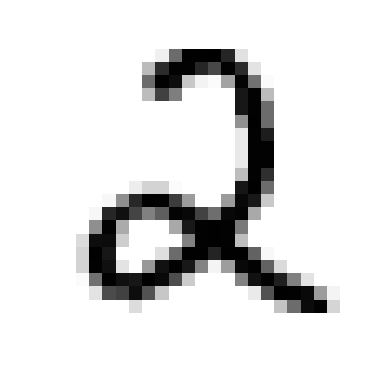

In [5]:
import matplotlib
import matplotlib.pyplot as plt

def display_image(data):
    """

    :param data:
    :param idx:
    :return:
    """
    plt.imshow(data, cmap=matplotlib.cm.binary)
    plt.axis('off')
    plt.show()

    return None


random_number = 54325
# image is 28x28 pixels. The data need to be reshaped in that 
# format before we can view it.
random_image_data = X.values[random_number].reshape(28, 28) 
display_image(random_image_data)

<Figure size 1500x600 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

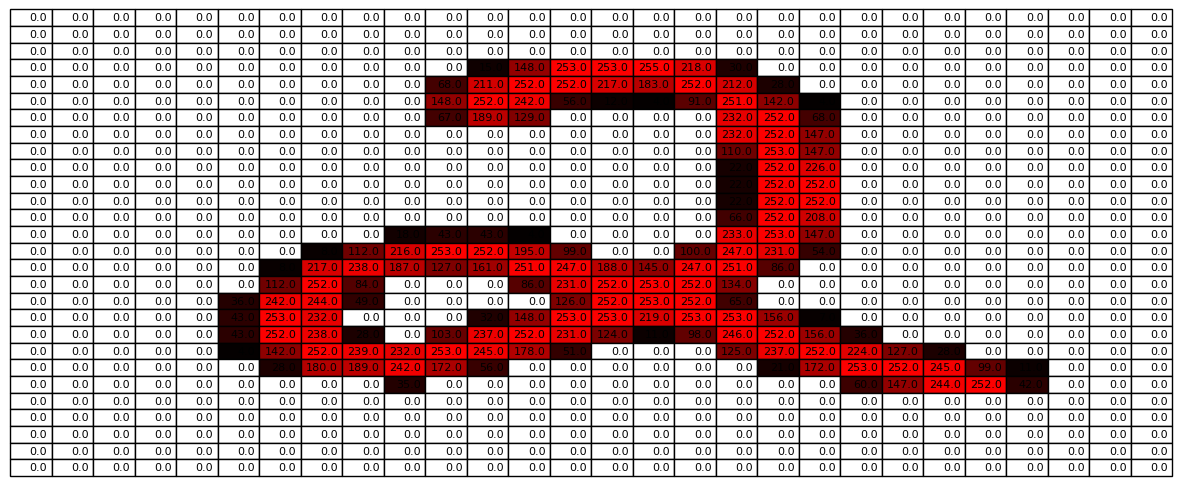

In [6]:
import numpy as np

def rgb_to_hex(i):
    """
    The primary purpose of this function is to give a color value for each
    cell in the table below.
    
    we are using the pixel intensity (i) as the color coordinate for 
    channel R(red). For other 2 channels G, B we use 0 as default
    value.
    """
    g, b = 0, 0
    if i == 0:
        """
        when the pixel intensity i is 0, (R, G, B) value of (0, 0, 0) is black color
        and that particular cells of the table becomes black and we can't see 
        pixel intensity value. so converting it to (255, 255, 255) so that the 
        cell color become white and we can the pixel intensity value of the cell.
        """
        i, g, b = 255, 255, 255  
    return '#%02x%02x%02x' % (int(i), g, b)


plt.figure(figsize=(15, 6))
cell_colors = np.vectorize(rgb_to_hex)(random_image_data)
plt.table(cellText=random_image_data, loc='center', cellColours=cell_colors)
plt.axis('off')
plt.show()

(-0.5, 279.5, 279.5, -0.5)

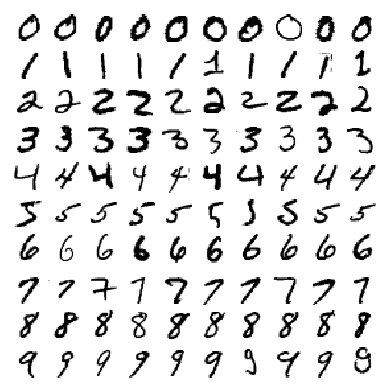

In [7]:
num_images_per_digit = 10
entire_image = []
for digit in range(10): # the 10 here represents the number of digits, 0 through 9.
    one_digit_images = X.values[y == digit][:num_images_per_digit]
    row_images = [np.array(image).reshape(28, 28) for image in one_digit_images]
    entire_image.append(np.concatenate(row_images, axis=1))
entire_image = np.concatenate(entire_image, axis=0)

plt.imshow(entire_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [8]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffling the training data and training labels
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train = y_train.sample(frac=1, random_state=42).reset_index(drop=True)

# standardizing the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler()

<Figure size 1500x600 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

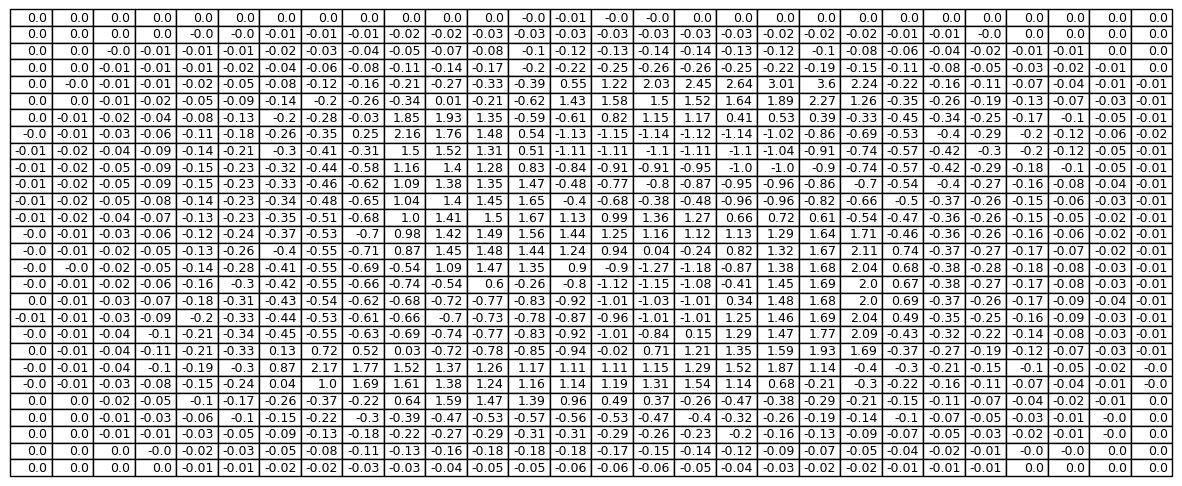

In [9]:
# even as we are using the same random number as before, the image
# it represents has changed as we have shuffled the data.
random_scaled_data = X_train_scaled[random_number].reshape(28, 28) 

def round_at_2(x):
    return round(x, 2) 

plt.figure(figsize=(15, 6))
random_scaled_data_round = np.vectorize(round_at_2)(random_scaled_data)
plt.table(cellText=random_scaled_data_round, loc='center')
plt.axis('off')
plt.show()

In [10]:
# importing stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# initializing an SGDClassifier.
SGD_clf = SGDClassifier(random_state=42)
SGD_clf.fit(X_train_scaled, y_train)
y_pred = SGD_clf.predict(X_test_scaled)
SGD_clf_acc = accuracy_score(y_test, y_pred)

print(f'the accuracy by stochastic gradient descent classifier is: {SGD_clf_acc}')

SGDClassifier(random_state=42)

the accuracy by stochastic gradient descent classifier is: 0.896


In [11]:
# neural network with densely connected layers to classify 
# handwritten digits with keras functional API
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28*28), name="Input")
x = layers.Dense(512, activation='relu', name='Hidden')(inputs)
outputs = layers.Dense(10, activation='softmax', name='Output')(x)
model_dnn = keras.Model(inputs=inputs, outputs=outputs)

# API for model visualization reference.
# keras.utils.plot_model(model_dnn, show_shapes=True)

# summarize the model
model_dnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 Hidden (Dense)              (None, 512)               401920    
                                                                 
 Output (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


2024-04-27 16:46:21.609058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-27 16:46:21.634837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-27 16:46:21.634920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-27 16:46:21.635303: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [12]:
model_dnn.compile(optimizer='rmsprop', 
                            loss='sparse_categorical_crossentropy', 
                            metrics=['accuracy'])

model_dnn.fit(X_train_scaled, y_train, epochs=5, batch_size=128)
test_loss, test_acc = model_dnn.evaluate(X_test_scaled, y_test)

print(f'\nthe accuracy from neural network with \
densely connected layer is: {test_acc:.3f}')

Epoch 1/5
  1/469 [..............................] - ETA: 6:31 - loss: 3.2077 - accuracy: 0.0703

2024-04-27 16:46:23.108689: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


469/469 [==============================] - 2s 2ms/step - loss: 0.2225 - accuracy: 0.9384
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0967 - accuracy: 0.9730
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0649 - accuracy: 0.9829
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0485 - accuracy: 0.9879
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0398 - accuracy: 0.9904


313/313 [==============================] - 0s 721us/step - loss: 0.1581 - accuracy: 0.9721

the accuracy from neural network with densely connected layer is: 0.972


In [13]:
# convolutional neural network layers to classify 
# handwritten digits with keras functional API

"""
convolutional neural network (convnet) takes rank-3 
tensors as input (image height, image width, chaanel depth)
so reshaping the input data as below is necessary.
"""
X_train_scaled = X_train_scaled.reshape((60000, 28, 28, 1))
X_test_scaled = X_test_scaled.reshape((10000, 28, 28, 1))

inputs = keras.Input(shape=(28, 28, 1), name='input')
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', 
                  name='first_cnn_layer')(inputs)
x = layers.MaxPooling2D(pool_size=2, name='first_max_pooling_layer')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', 
                  name='second_cnn_layer')(x)
x = layers.MaxPooling2D(pool_size=2, name='second_max_pooling_layer')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu', 
                  name='third_cnn_layer')(x)

"""
the output of a convolution layer needs to be flattened before
it is sent to final dense layer with softmax activation for prediction.
"""
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_cnn = keras.Model(inputs=inputs, outputs=outputs)

# print an useful summary of the model, which includes
# name, type and output shape of each layer
model_cnn.summary()

'\nconvolutional neural network (convnet) takes rank-3 \ntensors as input (image height, image width, chaanel depth)\nso reshaping the input data as below is necessary.\n'

'\nthe output of a convolution layer needs to be flattened before\nit is sent to final dense layer with softmax activation for prediction.\n'

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 first_cnn_layer (Conv2D)    (None, 26, 26, 32)        320       
                                                                 
 first_max_pooling_layer (Ma  (None, 13, 13, 32)       0         
 xPooling2D)                                                     
                                                                 
 second_cnn_layer (Conv2D)   (None, 11, 11, 64)        18496     
                                                                 
 second_max_pooling_layer (M  (None, 5, 5, 64)         0         
 axPooling2D)                                                    
                                                                 
 third_cnn_layer (Conv2D)    (None, 3, 3, 128)         7385

In [15]:
model_cnn.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_cnn.fit(X_train_scaled, y_train, epochs=5, batch_size=64)

test_loss, test_acc = model_cnn.evaluate(X_test_scaled, y_test)
print(f'\nthe accuracy from convolutional neural network is: {test_acc:.3f}')

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0138 - accuracy: 0.9962
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0102 - accuracy: 0.9969
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0086 - accuracy: 0.9977
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0058 - accuracy: 0.9983


313/313 [==============================] - 0s 834us/step - loss: 0.0429 - accuracy: 0.9916

the accuracy from convolutional neural network is: 0.992
